# Sentiment Analysis using Tweets
We will be preprocessing tweet dataset for sentiment analysis using the [NLTK](http://www.nltk.org) package. To become more familiar with preprocessing we will be using a dataset already provided by NLTK.

In [1]:
# !pip install matplotlib

In [2]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

## About the Twitter dataset
---
The dataset from NLTK is separated into positive and negative tweets. Each set contains exactly 5,000 tweets so the data is balanced. Let's take a look at what's inside.

In [3]:
# download sample dataset. Can be found in twitter_samples folder.
# nltk.download('twitter_samples')

In [4]:
# Save positive and negative tweets
all_positive_tweets = twitter_samples.strings("positive_tweets.json")
all_negative_tweets = twitter_samples.strings("negative_tweets.json")

In [5]:
# A quick glimpse at the positive tweets
print(f"\033[92m {all_positive_tweets[random.randint(0,5000)]}")

 @theguyliner @Trishie_D cool. :D


In [6]:
# Quick glimpse at the negative tweets
print(f"\033[92m {all_negative_tweets[random.randint(0,5000)]}")

 Oh how horrific :( https://t.co/IObpbythB8


In [7]:
# Total tweets in each dataset (positive and negative)
print(f"Total positive tweets: {len(all_positive_tweets)} with type({type(all_positive_tweets)}) \n\
Total negative tweets: {len(all_negative_tweets)} with type({type(all_negative_tweets)})")

print(f"\nElements within the list are type({type(all_positive_tweets[0])})")

Total positive tweets: 5000 with type(<class 'list'>) 
Total negative tweets: 5000 with type(<class 'list'>)

Elements within the list are type(<class 'str'>)


Notice that the data is stored in a list and individual tweets are stored as strings. 

### Pie Chart Visualization
Let's try to visualize this more in a pie chart using Matplotlib's [pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) library.

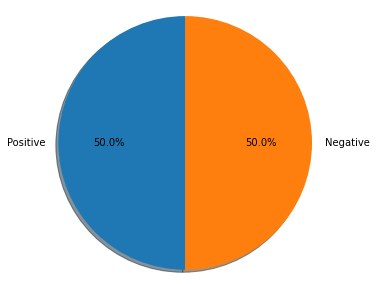

In [8]:
# Declare the size of the figure, the labels, aand size for each slide.
canvas = plt.figure(figsize=(5,5))
labels = "Positive", "Negative"
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# Declare the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# Aspect ratio for the pie circle
plt.axis('equal')

# Display chart
plt.show()

## Building Word Frequencies
First we will clean and preprocess the data using the ```process_tweet(tweet)``` method from ```utils.py```. The method with perform the following operations:

* Remove hashtags, stopwords, and punctuations
* Tokenization
* Stemming


Then, we create a dictionary with the key being a tuple ```(word, sentiment)``` and the value ```frequency the word occurs```. This is excuted using the ```buiild_freq``` function from ```utils.py```.

In [9]:
from utils import process_tweet, build_freq
import numpy as np

[nltk_data] Downloading package stopwords to /Users/aza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Combine all tweets together.
all_tweets = all_positive_tweets + all_negative_tweets

print(f"Total # of tweets: {len(all_tweets)}")

Total # of tweets: 10000


Now we will build a labels array that matches the sentiments of the tweets. ```labels``` will be composed of 10,000 elements. First 5,000 will be filled with ```1``` signifying positive sentiments. The next 5,000 will be filled with the ```0``` label denoting negative sentiments. We will do this using the ```numpy``` library.

Note:

* ```np.ones()``` - Creates an array of 1s
* ```np.zeroes()``` - Creates an array of 0s
* ```np.append()``` - Concatenates arrays

In [11]:
# Create a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

In [12]:
# Build frequency dictionary
freq = build_freq(all_tweets, labels)

len(freq)

13075

In [18]:
freq

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3568,
 ('hey', 1.0): 76,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 97,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 620,
 ('listen', 1.0): 16,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 129,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 400,
